# Pr8-1: 動画の表示・入出力

ここでは，Open CVを使った動画の表示・入出力の基本を確認します．

## 必要なライブラリのインストール

In [2]:
# プログレスバー用ライブラリのインストール
from fastprogress import progress_bar

# 動画入出力に使うライブラリ
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Colab上での出力用ライブラリ
from IPython.display import HTML
from IPython.display import Video
import base64
import io


## 動画の読み込みと基本情報の表示

```
cap = cv2.VideoCapture(in_file)
```

の形式で，VideoCaptureオブジェクトを作成すると，
cap.get(prop_name)で色々な情報を取ってこれます．

|  プロパティ名  |  説明  |
|:---- |:---- |
|  cv2.CAP_PROP_FRAME_WIDTH |  動画の幅  |
|  cv2.CAP_PROP_FRAME_HEIGHT  |  動画の高さ |
| cv2.CAP_PROP_FPS| 動画のフレームレート |
|cv2.CAP_PROP_FRAME_COUNT| 動画のフレーム数|



In [3]:
in_file = "xylophone.mp4"
cap = cv2.VideoCapture(in_file)

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print("Video Info: {0}".format(in_file))
print("- (w, h): ({0}, {1})".format(w, h))
print("- fps: {0}".format(fps))
print("- num_frames: {0}".format(num_frames))

Video Info: xylophone.mp4
- (w, h): (320, 240)
- fps: 30.0
- num_frames: 9


## 各フレームを連番画像として読み込む．

動画の読み込みループの基本構造は以下のようになっています．

```py
# 動画の読み込みとフレーム数へのアクセス
cap = cv2.VideoCapture(in_file)
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 動画の読み込みループ
for i in progress_bar(range(num_frames)):
  ret, I = cap.read()
  if ret==False:
    break

# 動画オブジェクトの解放
cap.release()

```

こちらに，特定のフレームだけ画像を保存するコードをつけると，連番画像を確認できます．

```py
if i in frames:
    images.append(cv2.cvtColor(I_bgr, cv2.COLOR_BGR2RGB))
```

ValueError: num must be 1 <= num <= 2, not 3

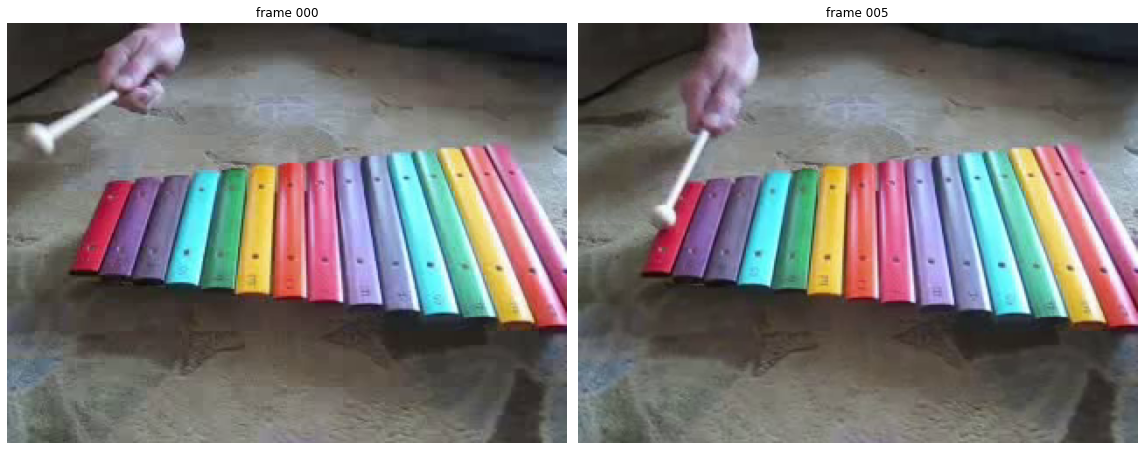

In [4]:
frames = [0, 5, 10, 15]
images = []

# 動画の読み込みとフレーム数へのアクセス
cap = cv2.VideoCapture(in_file)

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 動画の読み込みループ
for i in progress_bar(range(num_frames)):
    ret, I_bgr = cap.read()
    if ret == False or i > frames[-1]:
        break
    if i in frames:
        images.append(cv2.cvtColor(I_bgr, cv2.COLOR_BGR2RGB))

# 動画オブジェクトの解放
cap.release()

num_images = len(images)

fig = plt.figure(figsize=(16, 8), tight_layout=True)

for i, frame in enumerate(frames):
    plt.subplot(1, num_images, i+1)
    plt.imshow(images[i])
    plt.title(f"frame {frame:03d}")
    plt.axis('off')


## 動画ファイルのコンバーター

cap = cv2.VideoCaptureで読み込みながら，writer = cv2.VideoWriterで別ファイルに出力すると，動画ファイルのコンバーターができます．

指定のコーデックには，対応した拡張子を設定する必要があるので出力ファイル名に少し注意してください．

|  コーデック  |  拡張子  |
|:---- |:---- |
| MP4V |  .mp4（MPEG-4 Video）  |
|  vp80  |  .webm（HTML5向けの動画規格） |
|WMV2| .wmv（Windows Media Video）|

### Work: 動画ファイルの変換

下記の動画ファイルコンバーターを使って，コーデックと拡張子を設定し，
- xylophone.mp4 -> xylophone.webm
- xylophone.mp4 -> xylophone.wmv

のファイルを出力してください．

動画の出力ループの基本は以下のようになっています．

```py
# 動画の読み込みとフレーム数へのアクセス
fourcc = cv2.VideoWriter_fourcc(*codec)
writer = cv2.VideoWriter(out_file, fourcc, fps, (w, h))

# 動画の出力ループ
for i in progress_bar(range(num_frames)):
  writer.write(I)

# 動画オブジェクトの解放
writer.release()
```

上で紹介した読み込みループと合わせると，読み込んだ連番画像を新しい動画として出力することができます．


In [5]:
# @title 変換用パラメータ
# @markdown 入力ファイル名を指定してください．

in_file = "xylophone.mp4"  # @param {type:"string"}

# @markdown 出力ファイル名を指定してください．

out_file = "xylophone.webm"  # @param {type:"string"}
codec = "vp80"  # @param ["MP4V", "vp80", "WMV2"]


def video_conv(in_file, out_file, codec):
    cap = cv2.VideoCapture(in_file)

    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*codec)

    writer = cv2.VideoWriter(out_file, fourcc, fps, (w, h))

    for i in progress_bar(range(num_frames)):
        ret, I = cap.read()
        if ret == False:
            break
        writer.write(I)

    cap.release()
    writer.release()


video_conv(in_file, out_file, codec)


OpenCV: FFMPEG: tag 0x30387076/'vp80' is not supported with codec id 139 and format 'webm / WebM'


## Colabを利用する場合の動画表示について

Google Colab上では，OpenCVのWindowを立ち上げられず，Matplotのアニメーション表示もできないため，1フレームずつ処理しながらプレビューすることができません．

動画処理を加えた出力動画を確認したい場合，主に以下の2つの選択肢があります．

1. 動画をダウンロードして表示する
2. Colab上でHTML出力して確認する

### 1. 動画をダウンロード
一番簡単な方法で，左側のファイルメニューからファイルを選択してダウンロードし，確認できます．ただし，出力するたびにファイルのダウンロードが必要になります．


### 2. Colab上でHTML出力して確認する

Colab上で動画ファイルを表示するのはハードルが高くなりますが，HTMLの枠組みを利用することで実行速度はかかりますが表示可能です．<br>
（演習ではこの枠組みを使います）

ポイントは，HTMLのvideoタグを利用することで，source部分にファイルから読み込んだ動画データを転送することで動画を表示できるようになります．

```html
<video width="640" height="480" controls>
  <source src="data:video/mp4;base64,{video_data}" type="video/mp4" />
</video>
```

## Work: HTMLでの動画のプレビュー

webm形式で出力した動画ファイルをHTMLでプレビューしてください．

In [7]:
# @title 表示用動画の指定
# @markdown 動画ファイル名を指定してください．
in_video = "xylophone.webm"  # @param {type:"string"}
def display_video(video_file):
    cap = cv2.VideoCapture(video_file)
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    video = io.open(video_file, 'r+b').read()
    encoded = base64.b64encode(video)
    html_code = '''<video width="70%" height="70%" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''

    return(HTML(data=html_code.format(encoded.decode('ascii'))))


display_video(in_video)

## 動画ファイルのトリミング（おまけ）

事後課題などの入力動画を作る際などに使ってみてください．
- 動画サイズの縮小
- 開始位置，終了位置の指定

が可能です．

In [7]:
#@title 変換用パラメータ
#@markdown 入力ファイル名を指定してください．

in_file = "xylophone.mp4" #@param {type:"string"}

#@markdown 出力ファイル名を指定してください．

out_file = "xylophone.webm" #@param {type:"string"}
codec = "vp80" #@param ["MP4V", "vp80", "WMV2"]

#@markdown 開始フレーム，終了フレーム
start_frame = 25 #@param {type:"slider", min:0, max:1200, step:1}
end_frame = 66 #@param {type:"slider", min:0, max:1200, step:1}

#@markdown 大きいと重いので横幅をw_targetに縮小．
w_target = 512 #@param {type:"slider", min:128, max:800, step:1}

def video_trimming(in_file, out_file, codec, start_frame, end_frame, w_target):
  cap = cv2.VideoCapture(in_file)

  num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  fps = cap.get(cv2.CAP_PROP_FPS)
  print("- (w, h): ({0}, {1})".format(w, h))
  print("- num_frames: {0}".format(num_frames))

  end_frame = min(num_frames-1, end_frame)

  w_out = w
  h_out = h

  scale = w_target / w
  if scale < 1.0:
    w_out = int(w*scale)
    h_out = int(h*scale)

  fourcc = cv2.VideoWriter_fourcc(*codec)
  
  writer = cv2.VideoWriter(out_file, fourcc, fps, (w_out, h_out))
  
  for i in progress_bar(range(end_frame+1)):
    ret, I = cap.read()
    if i < start_frame:
      continue

    if ret==False:
      break

    I = cv2.resize(I, dsize=(w_out, h_out))
    writer.write(I)

  cap.release()
  writer.release()

video_trimming(in_file, out_file, codec, start_frame, end_frame, w_target)

- (w, h): (320, 240)
- num_frames: 9


OpenCV: FFMPEG: tag 0x30387076/'vp80' is not supported with codec id 139 and format 'webm / WebM'
